In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd

# Load the dataset
parkinsons_df = pd.read_csv(r'C:\Users\Admin\Desktop\CodClause\Task_03\parkinsons.data')

parkinsons_df.head(10)
parkinsons_df.info()
parkinsons_df.describe()
parkinsons_df.columns.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

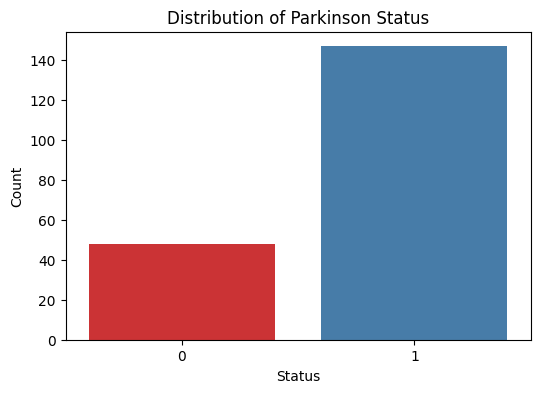

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot bar plot for 'status'
plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=parkinsons_df, hue='status', palette='Set1', legend=False)
plt.title('Distribution of Parkinson Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


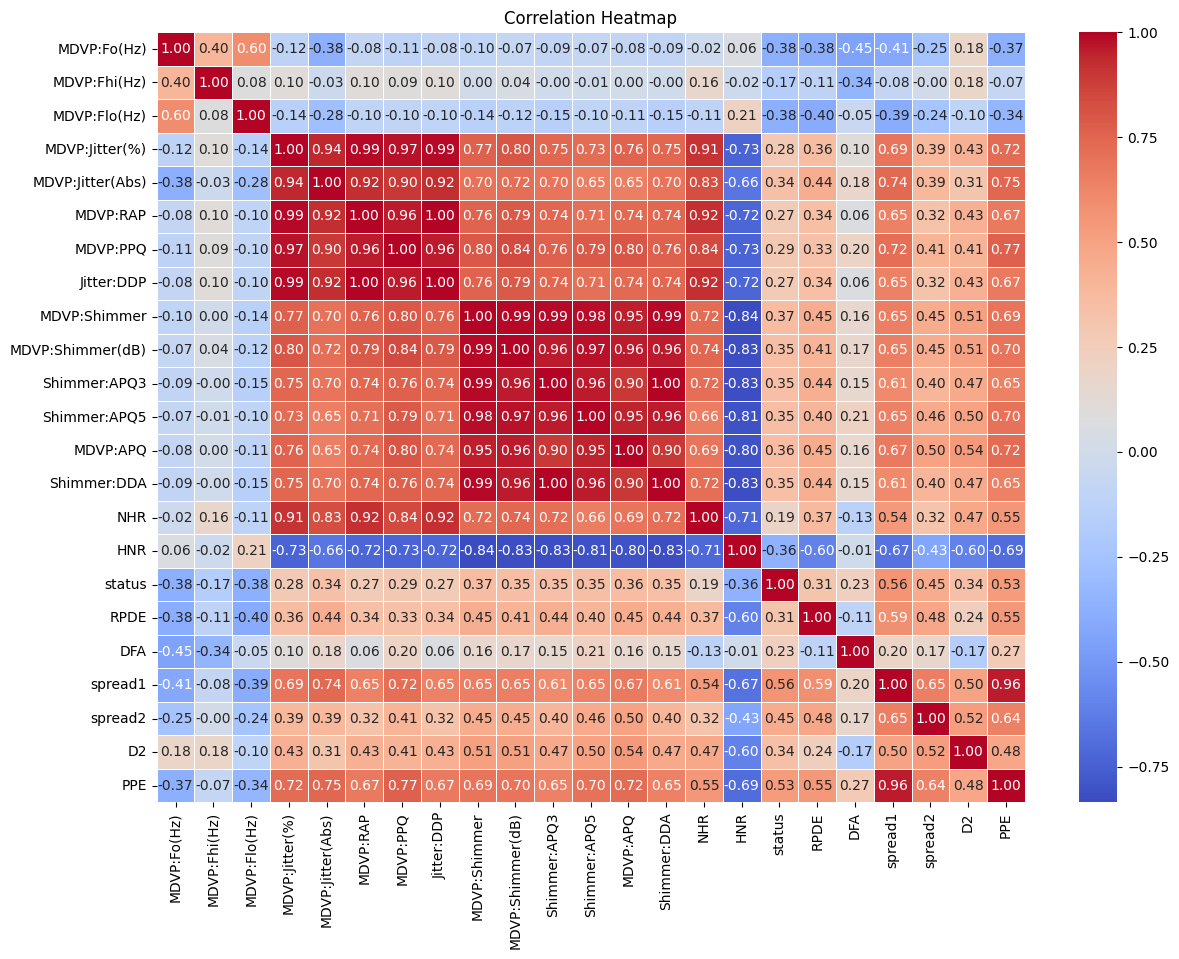

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame from the provided data
df = pd.DataFrame(parkinsons_df)

# Compute the correlation matrix
corr = df.drop(['name'], axis=1).corr()

# Generate a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_5128\1850458302.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr()[['status']].sort_values(by='status', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


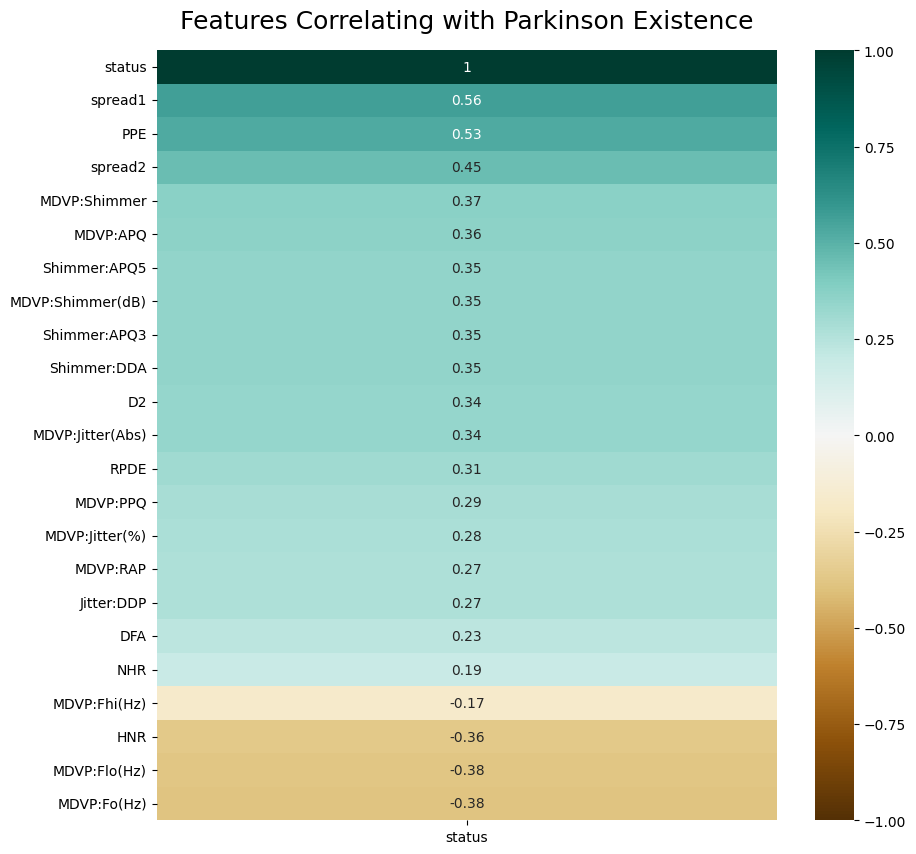

In [5]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr()[['status']].sort_values(by='status', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Parkinson Existence', fontdict={'fontsize':18}, pad=16);
plt.show()


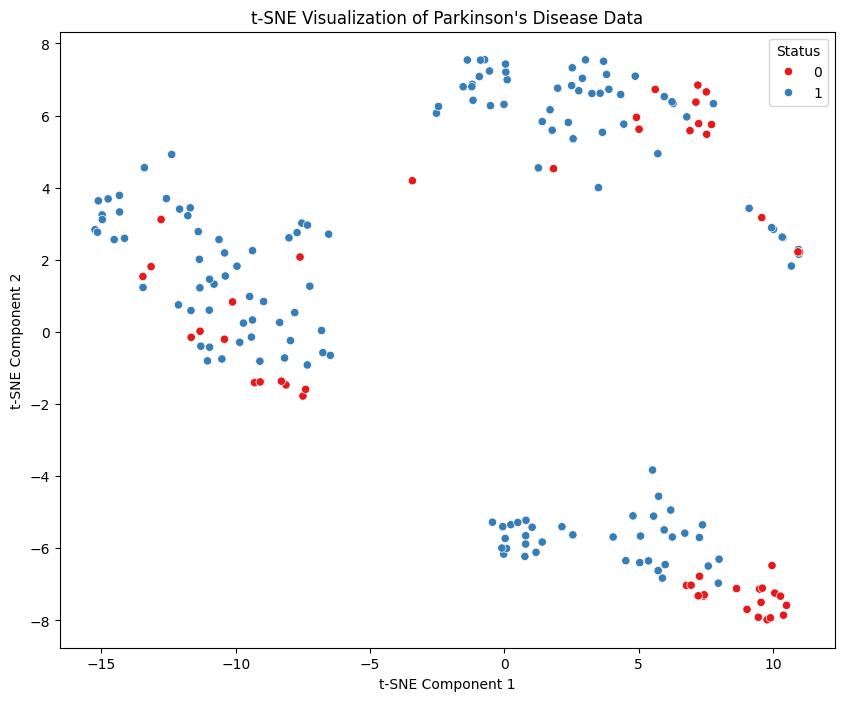

In [6]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
# Separate features and target variable
X = df.drop(['name', 'status'], axis=1)  # Features
y = df['status']  # Target variable

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the reduced-dimensional data
df_tsne = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['status'] = y.values

# Plot the t-SNE visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='status', data=df_tsne, palette='Set1')
plt.title('t-SNE Visualization of Parkinson\'s Disease Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Status', loc='upper right')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'X' contains features and 'y' contains the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8974358974358975


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



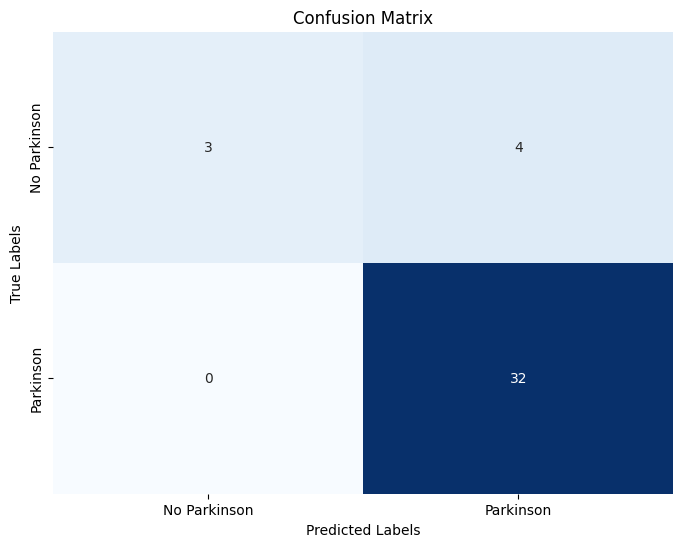

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'y_test' contains the true labels and 'y_pred' contains the predicted labels
# Calculate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=['No Parkinson', 'Parkinson'], 
            yticklabels=['No Parkinson', 'Parkinson'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best Parameters: {'C': 10, 'penalty': 'l2'}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



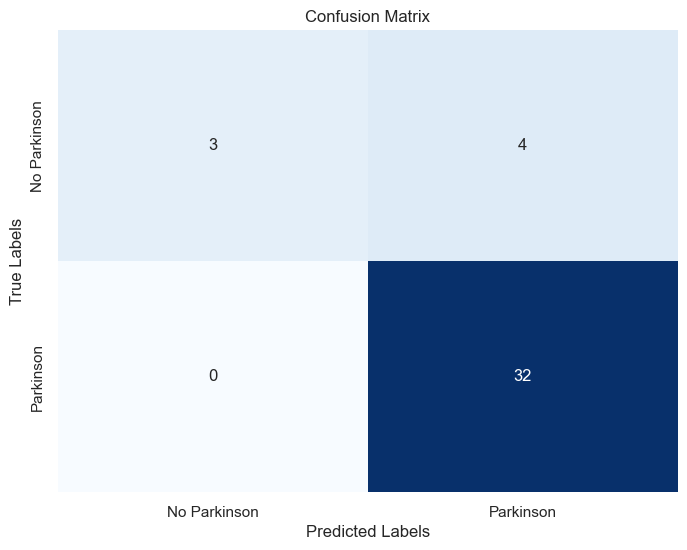

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define Logistic Regression model
logistic_regression = LogisticRegression()

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty (L1 or L2 regularization)
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Access best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Access best estimator (model)
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'y_test' contains the true labels and 'y_pred' contains the predicted labels
# Calculate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=['No Parkinson', 'Parkinson'], 
            yticklabels=['No Parkinson', 'Parkinson'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Best Parameters: {'max_depth': 10, 'n_estimators': 150}
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 1]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



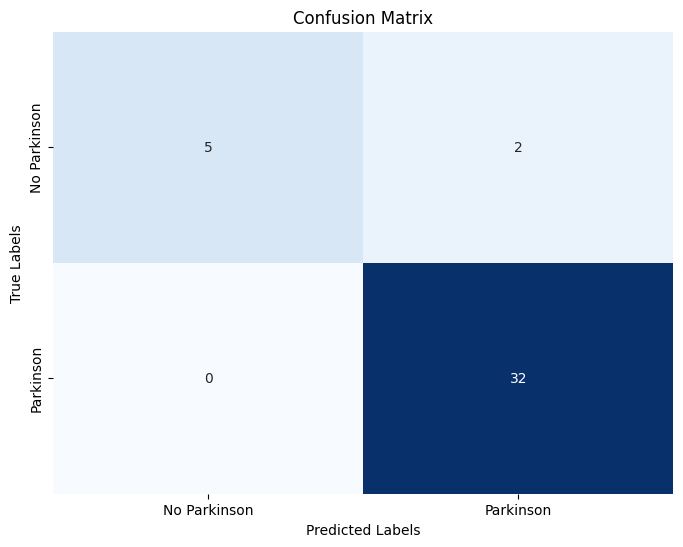

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Access best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Access best estimator (model)
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)
print(y_pred)

from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'y_test' contains the true labels and 'y_pred' contains the predicted labels
# Calculate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=['No Parkinson', 'Parkinson'], 
            yticklabels=['No Parkinson', 'Parkinson'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [10]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "Parkinsons_Disease_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(best_model, file)

Best Parameters: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.88      0.88      0.88        32

    accuracy                           0.79        39
   macro avg       0.65      0.65      0.65        39
weighted avg       0.79      0.79      0.79        39



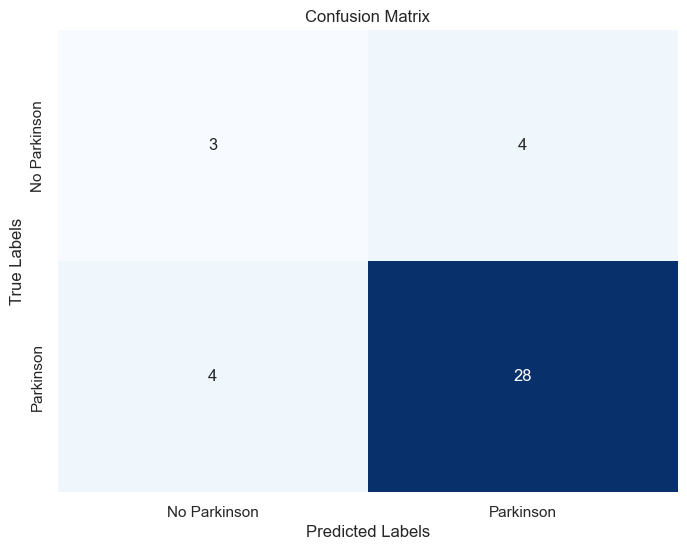

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define KNN classifier
knn_classifier = KNeighborsClassifier()

# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Access best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Access best estimator (model)
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'y_test' contains the true labels and 'y_pred' contains the predicted labels
# Calculate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=['No Parkinson', 'Parkinson'], 
            yticklabels=['No Parkinson', 'Parkinson'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

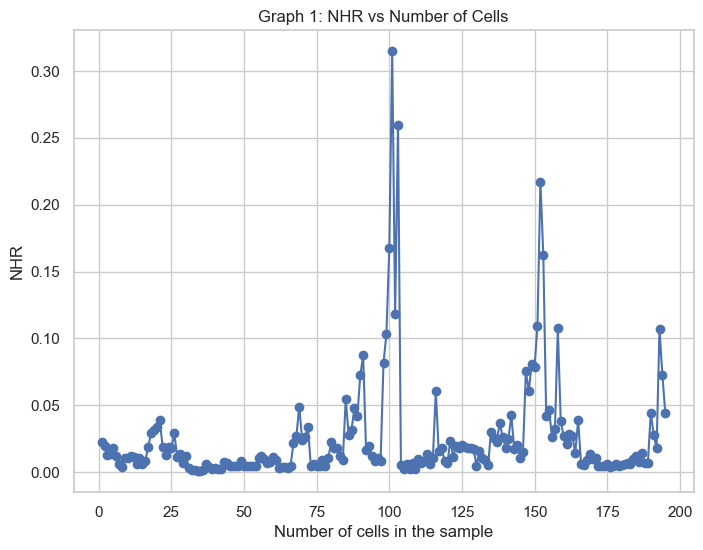

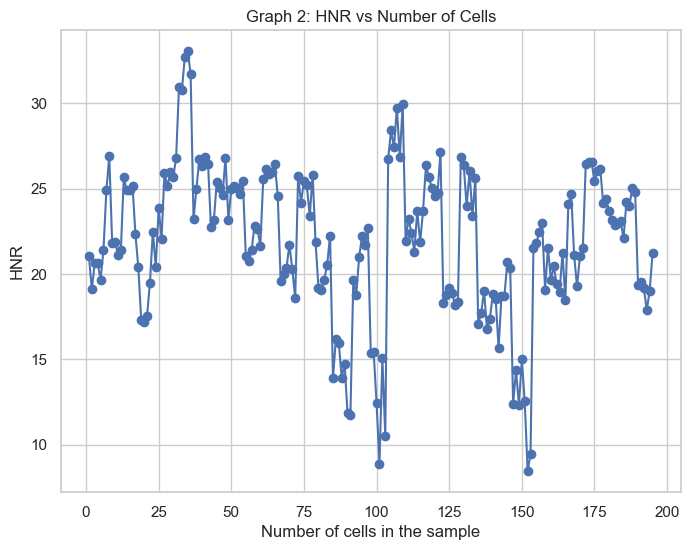

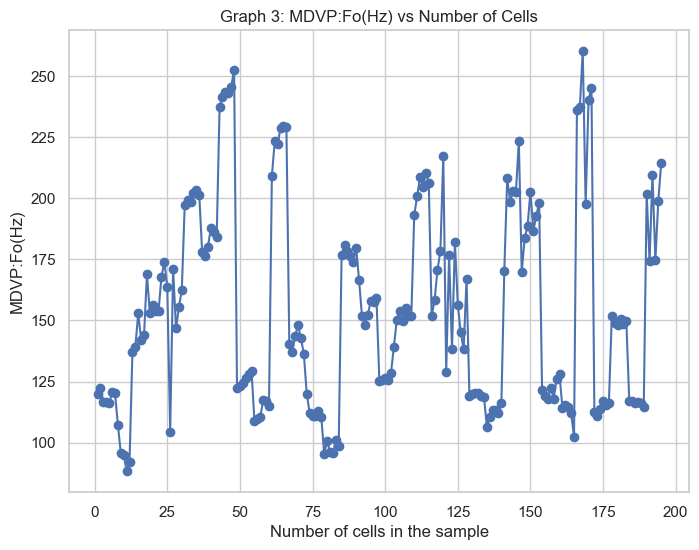

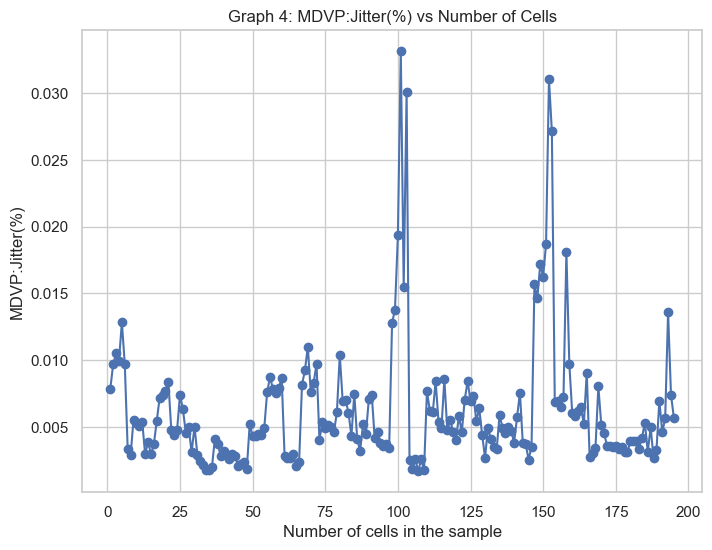

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv('parkinsons.data')

# Extract data for Graph 1
x1 = range(1, len(data) + 1)  # Number of cells in the sample
y1 = data['NHR']  # NHR values

# Extract data for Graph 2
x2 = range(1, len(data) + 1)  # Number of cells in the sample
y2 = data['HNR']  # HNR values

# Extract data for Graph 3
x3 = range(1, len(data) + 1)  # Number of cells in the sample
y3 = data['MDVP:Fo(Hz)']  # MDVP:Fo(Hz) values

# Extract data for Graph 4
x4 = range(1, len(data) + 1)  # Number of cells in the sample
y4 = data['MDVP:Jitter(%)']  # MDVP:Jitter(%) values

# Create Graph 1
plt.figure(figsize=(8, 6))
plt.plot(x1, y1, marker='o', linestyle='-')
plt.xlabel('Number of cells in the sample')
plt.ylabel('NHR')
plt.title('Graph 1: NHR vs Number of Cells')
plt.grid(True)
plt.show()

# Create Graph 2
plt.figure(figsize=(8, 6))
plt.plot(x2, y2, marker='o', linestyle='-')
plt.xlabel('Number of cells in the sample')
plt.ylabel('HNR')
plt.title('Graph 2: HNR vs Number of Cells')
plt.grid(True)
plt.show()

# Create Graph 3
plt.figure(figsize=(8, 6))
plt.plot(x3, y3, marker='o', linestyle='-')
plt.xlabel('Number of cells in the sample')
plt.ylabel('MDVP:Fo(Hz)')
plt.title('Graph 3: MDVP:Fo(Hz) vs Number of Cells')
plt.grid(True)
plt.show()

# Create Graph 4
plt.figure(figsize=(8, 6))
plt.plot(x4, y4, marker='o', linestyle='-')
plt.xlabel('Number of cells in the sample')
plt.ylabel('MDVP:Jitter(%)')
plt.title('Graph 4: MDVP:Jitter(%) vs Number of Cells')
plt.grid(True)
plt.show()

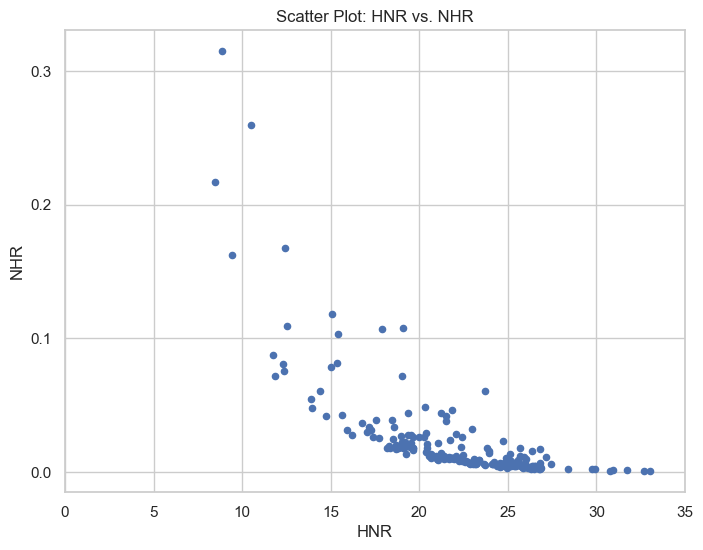

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv('parkinsons.data')

# Extract data for the scatter plot
hnr_values = data['HNR']
nhr_values = data['NHR']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(hnr_values, nhr_values, marker='o', s=20)  # 's' controls the marker size
plt.xlabel('HNR')
plt.ylabel('NHR')
plt.title('Scatter Plot: HNR vs. NHR')
plt.grid(True)

# Customize the axes to show HNR in increments of 5 and NHR in increments of 0.1
plt.xticks(range(0, int(max(hnr_values)) + 6, 5))
plt.yticks([i / 10 for i in range(0, int(max(nhr_values) * 10) + 1, 1)])

plt.show()

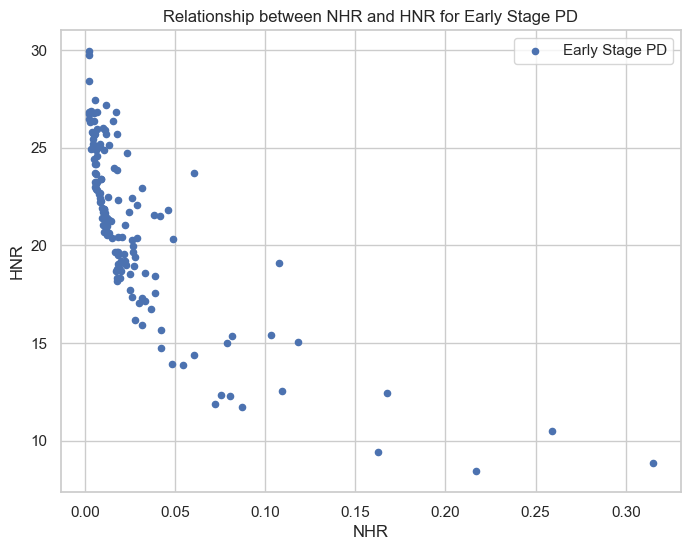

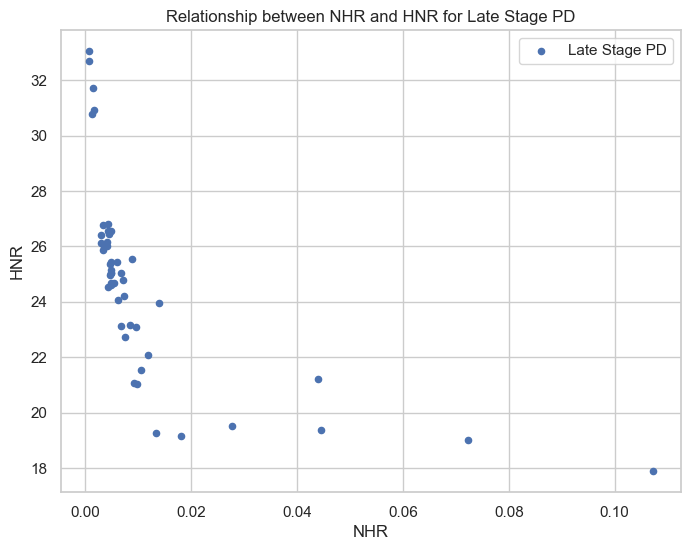

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv('parkinsons.data')

# Extract NHR, HNR, and PD stage (status) data
nhr_values = data['NHR']
hnr_values = data['HNR']
pd_stage = data['status']

# Filter data for early and late stages
early_stage_nhr = nhr_values[pd_stage == 1]
early_stage_hnr = hnr_values[pd_stage == 1]
late_stage_nhr = nhr_values[pd_stage == 0]
late_stage_hnr = hnr_values[pd_stage == 0]

# Create scatter plot for early stage PD
plt.figure(figsize=(8, 6))
plt.scatter(early_stage_nhr, early_stage_hnr, marker='o', s=20, label='Early Stage PD')
plt.xlabel('NHR')
plt.ylabel('HNR')
plt.title('Relationship between NHR and HNR for Early Stage PD')
plt.grid(True)
plt.legend()

# Save the plot as an image
plt.savefig('early_stage_PD_scatter.png')

# Create scatter plot for late stage PD
plt.figure(figsize=(8, 6))
plt.scatter(late_stage_nhr, late_stage_hnr, marker='o', s=20, label='Late Stage PD')
plt.xlabel('NHR')
plt.ylabel('HNR')
plt.title('Relationship between NHR and HNR for Late Stage PD')
plt.grid(True)
plt.legend()

# Save the plot as an image
plt.savefig('late_stage_PD_scatter.png')

# Display the plots
plt.show()

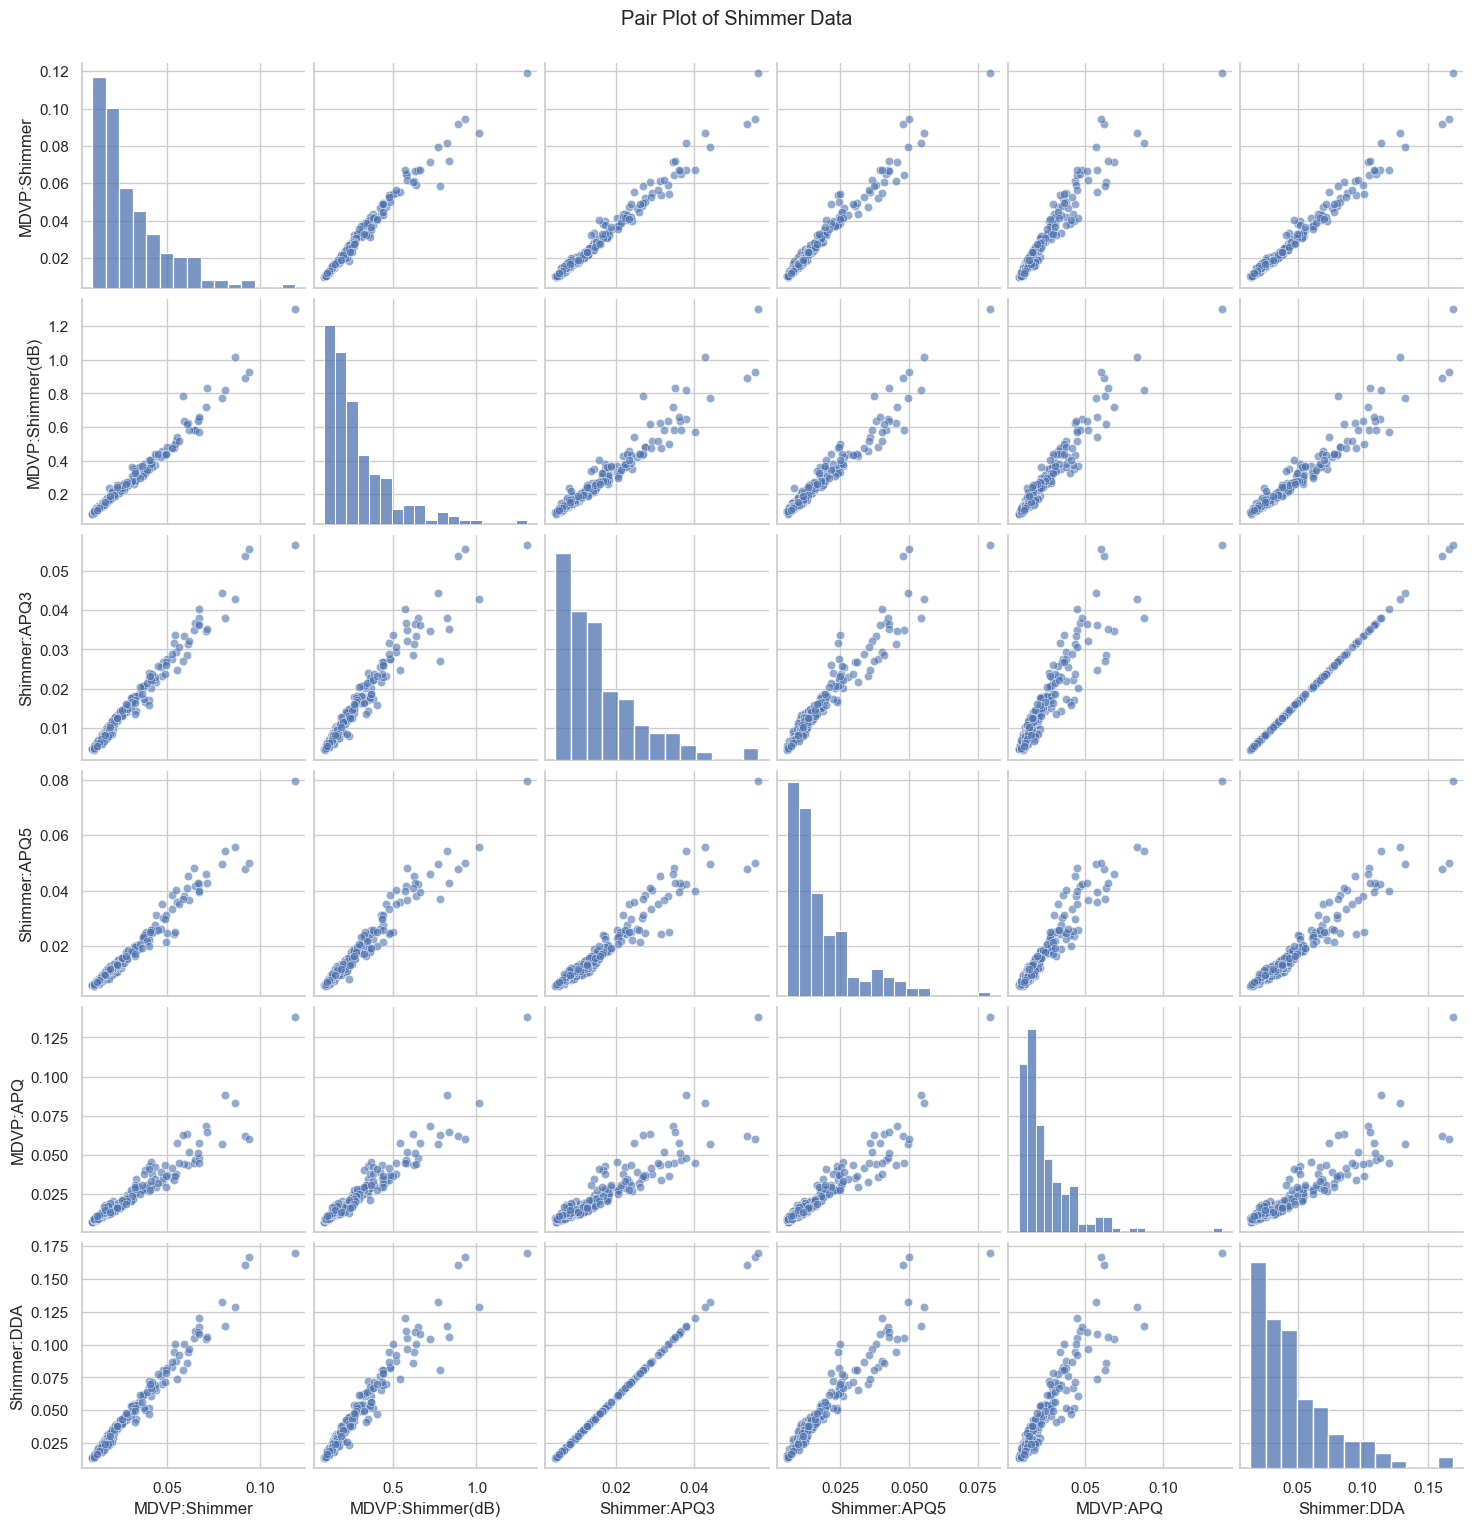

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
data = pd.read_csv('parkinsons.data')

# Select shimmer-related columns
shimmer_columns = [
    'MDVP:Shimmer',
    'MDVP:Shimmer(dB)',
    'Shimmer:APQ3',
    'Shimmer:APQ5',
    'MDVP:APQ',
    'Shimmer:DDA'
]

# Create a pair plot for shimmer data using Seaborn
shimmer_data = data[shimmer_columns]
sns.set(style="whitegrid")
sns.pairplot(shimmer_data, plot_kws={"alpha": 0.6})
plt.suptitle("Pair Plot of Shimmer Data", y=1.02)
plt.show()